In [27]:
#!pip install jupyternotify
%load_ext jupyternotify

The jupyternotify extension is already loaded. To reload it, use:
  %reload_ext jupyternotify


In [28]:
import os
import numpy as np
import pandas as pd
from pprint import pprint

import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
path = "train_dataset\\train\\bart\\"

dataset = os.listdir(path)

dataset.sort()

len(dataset)
pprint(dataset)

['pic_0000.jpg',
 'pic_0001.jpg',
 'pic_0002.jpg',
 'pic_0003.jpg',
 'pic_0004.jpg',
 'pic_0005.jpg',
 'pic_0006.jpg',
 'pic_0007.jpg',
 'pic_0008.jpg',
 'pic_0009.jpg',
 'pic_0010.jpg',
 'pic_0011.jpg',
 'pic_0012.jpg',
 'pic_0013.jpg',
 'pic_0014.jpg',
 'pic_0015.jpg',
 'pic_0016.jpg',
 'pic_0017.jpg',
 'pic_0018.jpg',
 'pic_0019.jpg',
 'pic_0020.jpg',
 'pic_0021.jpg',
 'pic_0022.jpg',
 'pic_0023.jpg',
 'pic_0024.jpg',
 'pic_0025.jpg',
 'pic_0026.jpg',
 'pic_0027.jpg',
 'pic_0028.jpg',
 'pic_0029.jpg',
 'pic_0030.jpg',
 'pic_0031.jpg',
 'pic_0032.jpg',
 'pic_0033.jpg',
 'pic_0034.jpg',
 'pic_0035.jpg',
 'pic_0036.jpg',
 'pic_0037.jpg',
 'pic_0038.jpg',
 'pic_0039.jpg',
 'pic_0040.jpg',
 'pic_0041.jpg',
 'pic_0042.jpg',
 'pic_0043.jpg',
 'pic_0044.jpg',
 'pic_0045.jpg',
 'pic_0046.jpg',
 'pic_0047.jpg',
 'pic_0048.jpg',
 'pic_0049.jpg',
 'pic_0050.jpg',
 'pic_0051.jpg',
 'pic_0052.jpg',
 'pic_0053.jpg',
 'pic_0054.jpg',
 'pic_0055.jpg',
 'pic_0056.jpg',
 'pic_0057.jpg',
 'pic_0058.jpg

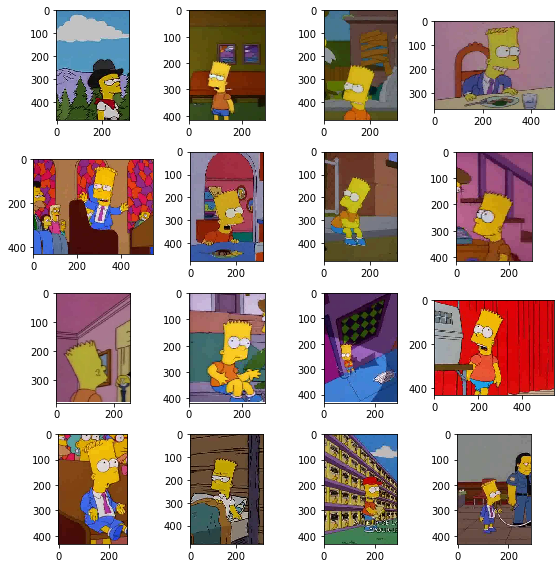

In [30]:
fig = plt.figure(figsize=(8, 8))

for i in range(16):

    plt.subplot(4, 4, 1 + i)
    plt.tight_layout()

    image_bgr = cv2.imread(path + "{}".format(dataset[i]))
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

    plt.imshow(image_rgb, cmap="rainbow", interpolation="none")
    #target = np.where(example_target[i]==1)[0]
    #plt.title("Ground Truth: {}".format(category.get(int(target))))

plt.show()

In [31]:
for i in range(5):
  image_bgr = cv2.imread(path + "{}".format(dataset[i]))
  image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
  print(image_rgb.shape)

(480, 320, 3)
(416, 288, 3)
(480, 320, 3)
(368, 496, 3)
(432, 544, 3)


## Dataframe으로 정리

In [32]:
top_path = "train_dataset\\train\\"
path_list = []
category_list = []
categories = ["bart", "charles_montgomery", "krusty", "lisa_simpson", "marge_simpson", "milhouse_van_houten", "moe_szyslak", "ned_flanders", "principal_skinner"]

for category in categories:
  path = top_path+category+"\\"
  dataset = os.listdir(path)
  
  for data in dataset:
    path_list.append(path + "{}".format(data))
    category_list.append(category)


df = pd.DataFrame({"path": path_list, "category": category_list})

print(df.shape)
print(df["category"].unique())
df.value_counts("category")

(11248, 2)
['bart' 'charles_montgomery' 'krusty' 'lisa_simpson' 'marge_simpson'
 'milhouse_van_houten' 'moe_szyslak' 'ned_flanders' 'principal_skinner']


category
ned_flanders           1454
moe_szyslak            1452
lisa_simpson           1354
marge_simpson          1311
bart                   1218
principal_skinner      1193
krusty                 1101
charles_montgomery     1086
milhouse_van_houten    1079
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11248 entries, 0 to 11247
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   path      11248 non-null  object
 1   category  11248 non-null  object
dtypes: object(2)
memory usage: 175.9+ KB


In [34]:
df

,path,category
0,train_dataset\train\bart\pic_0000.jpg,bart
1,train_dataset\train\bart\pic_0001.jpg,bart
2,train_dataset\train\bart\pic_0002.jpg,bart
3,train_dataset\train\bart\pic_0003.jpg,bart
4,train_dataset\train\bart\pic_0004.jpg,bart
...,...,...
11243,train_dataset\train\principal_skinner\pic_1190...,principal_skinner
11244,train_dataset\train\principal_skinner\pic_1191...,principal_skinner
11245,train_dataset\train\principal_skinner\pic_1192...,principal_skinner
11246,train_dataset\train\principal_skinner\pic_1193...,principal_skinner


# Data Loader + Preprocessing

In [35]:
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

In [36]:
#!/usr/bin/env python3
#!pip install einops
#!pip install tensorflow --user

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os

from tensorflow.data import Dataset
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50V2, DenseNet201, EfficientNetB0, ResNet101V2, DenseNet169, DenseNet121

from einops import rearrange
from sklearn.model_selection import train_test_split

In [37]:
from tensorflow.keras.utils import to_categorical, Sequence

class DataGenerator(Sequence):
    def __init__(self, list_IDs, labels, 
    batch_size, img_size, img_channel, num_classes, augmentations, shuffle=False):
     
        # 데이터 이미지 개별 주소 [ DataFrame 형식 (image 주소, image 클래스) ]
        self.list_IDs = list_IDs
        # 데이터 라벨 리스트 [ DataFrame 형식 (image 주소, image 클래스) ]
        self.labels = labels
        # 학습 Batch 사이즈
        self.batch_size = batch_size
        # 이미지 리사이징 사이즈
        self.img_size = img_size
        # 이미지 채널 [RGB or Gray]
        self.img_channel = img_channel
        # 데이터 라벨의 클래스 수
        self.num_classes = num_classes
        # 전체 데이터 수
        self.indexes = np.arange(len(self.list_IDs))
        self.shuffle=shuffle
        self.on_epoch_end()
        self.augment = augmentations
   
    def __len__(self):
        len_ = int(len(self.list_IDs)/self.batch_size)
        if len_*self.batch_size < len(self.list_IDs):
            len_ += 1
        return len_
    
    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        list_IDs_temp = [self.list_IDs[k] for k in indexes]
        X, y = self.__data_generation__(list_IDs_temp, index)
        
        return np.stack([
            self.augment(image=x)["image"] for x in X
        ], axis=0), y#to_categorical(y, num_classes=self.num_classes)
        #return X, y
            
    def __data_generation__(self, list_IDs_temp, index):
        X = np.zeros((self.batch_size, self.img_size, self.img_size, self.img_channel), dtype='uint8')
        y = np.zeros((self.batch_size, self.num_classes), dtype=int)
        for i, ID in enumerate(list_IDs_temp):
            img = cv2.imread(ID)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (self.img_size, self.img_size))
            X[i, ] = img 
            y[i, ] = to_categorical(self.labels[index*self.batch_size+i], num_classes=self.num_classes)
        return X, y
    
    def on_epoch_end(self):
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

In [38]:
import albumentations as A

AUGMENTATIONS_TRAIN = A.Compose([
    A.CLAHE(p=1.0, clip_limit=2.0),
    #A.ToFloat(max_value=255),
    A.Normalize(mean=(0, 0, 0), std=(1, 1, 1)),
    A.HorizontalFlip(p=0.5),
    #A.RandomContrast(limit=0.2, p=0.5),
    
    #A.RandomBrightness(limit=0.2, p=0.5),
    A.OneOf([
        A.HueSaturationValue(hue_shift_limit=5, sat_shift_limit=20,
                             val_shift_limit=10, p=.5),
        A.RandomBrightnessContrast(brightness_limit=0.2, 
                                   contrast_limit=0.2, 
                                   brightness_by_max=True, p=0.5),
        A.RandomGamma(gamma_limit=(80, 120), p=0.5)
    ]),
    A.GaussianBlur(p=0.2),
    A.ShiftScaleRotate(
        shift_limit=0.0625, scale_limit=0.1, 
        rotate_limit=30, border_mode=cv2.BORDER_REFLECT_101, p=0.8)
])
AUGMENTATIONS_TEST = A.Compose([
    A.CLAHE(p=1.0, clip_limit=2.0),
    #A.ToFloat(max_value=255),
    A.Normalize(mean=(0, 0, 0), std=(1, 1, 1))
])

In [39]:
# 전체 클래스 수
clss_num = len(df['category'].unique())
# 클래스 -> 숫자로 변환 (카테고리 형식의 클래스를 원 핫 인코딩)
labels_dict = dict(zip(df['category'].unique(), range(clss_num)))
df = df.replace({"category": labels_dict})

data = df['path']
target = df['category']


x_train, x_valid, y_train, y_valid = train_test_split(data, target, test_size=0.2, shuffle=True, stratify=target)
x_train.reset_index(drop=True, inplace=True), x_valid.reset_index(drop=True, inplace=True), y_train.reset_index(drop=True, inplace=True), y_valid.reset_index(drop=True, inplace=True)


(None, None, None, None)

In [40]:
x_train, y_train

(0                   train_dataset\train\bart\pic_0060.jpg
 1           train_dataset\train\ned_flanders\pic_0482.jpg
 2       train_dataset\train\principal_skinner\lisa_sim...
 3            train_dataset\train\moe_szyslak\pic_0428.jpg
 4          train_dataset\train\marge_simpson\pic_0280.jpg
                               ...                        
 8993              train_dataset\train\krusty\pic_0555.jpg
 8994    train_dataset\train\principal_skinner\pic_1155...
 8995        train_dataset\train\ned_flanders\pic_0355.jpg
 8996              train_dataset\train\krusty\pic_0527.jpg
 8997                train_dataset\train\bart\pic_0701.jpg
 Name: path, Length: 8998, dtype: object,
 0       0
 1       7
 2       8
 3       6
 4       4
        ..
 8993    2
 8994    8
 8995    7
 8996    2
 8997    0
 Name: category, Length: 8998, dtype: int64)

In [41]:
target_size = 224
img_ch = 3
num_class = 9
batch_size = 32

train_generator = DataGenerator(x_train,
                                y_train,
                                batch_size, target_size, 
                                img_ch, num_class, AUGMENTATIONS_TRAIN)
valid_generator = DataGenerator(x_valid, 
                                y_valid,
                                batch_size, target_size,
                                img_ch, num_class, AUGMENTATIONS_TEST)

In [42]:
x_train.shape

(8998,)

In [95]:
examples = list(enumerate(train_generator))
len(examples)

282

Target: (32, 9)
Data  : (32, 224, 224, 3)
[0 0 0 0 0 0 0 0 1]
[0 1 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 1 0 0]
[0 0 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 1 0]
[0 0 0 1 0 0 0 0 0]


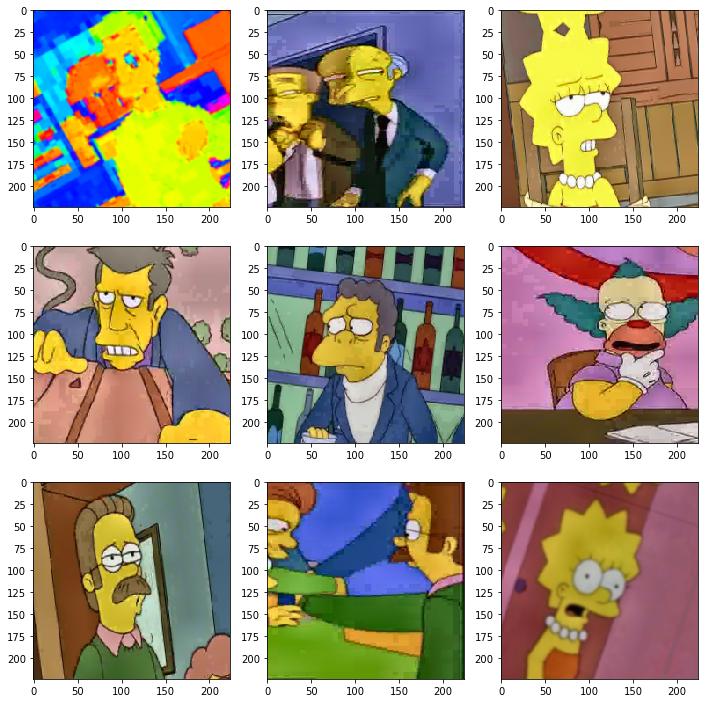

In [43]:
examples = enumerate(train_generator)
next(examples)
next(examples)
next(examples)
batch_idx, (example_data, example_target) = next(examples)

print("Target: {}".format(example_target.shape))
print("Data  : {}".format(example_data.shape))
fig = plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, 1 + i)
    plt.tight_layout()
    plt.imshow(tf.squeeze(example_data[i]), cmap="rainbow", interpolation="none")
    target = np.where(example_target[i]==1)[0]
    #plt.title("Ground Truth: {}".format(category.get(int(target))))
    print(example_target[i])
plt.show()

## 모델 구현

### 전이 학습 모델 (DenseNet121)

In [44]:

base_model = DenseNet121(#input_tensor=inputs,
                         weights="imagenet", 
                         input_shape=(224, 224, 3), 
                         include_top=False)

inputs = Input(shape=(224,224,3))
base_model.trainable = False
#base_model.summary()


X = base_model(inputs, training = False)
X = GlobalAveragePooling2D()(X)
X = Dense(64, activation="swish")(X)
X = BatchNormalization()(X)
X = Dropout(0.5)(X)
X = Dense(64, activation="swish")(X)
X = BatchNormalization()(X)
X = Dropout(0.2)(X)
outputs = Dense(9, activation="Softmax")(X)

model = Model(inputs=inputs, outputs=outputs)

model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
densenet121 (Functional)     (None, 7, 7, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                65600     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160

In [45]:
%%notify
def scheduler(epoch, lr):
  if epoch < 8:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

checkpoint_filepath = 'best_model.h5'


callback = [
            tf.keras.callbacks.LearningRateScheduler(scheduler),
            tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8),
            tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                               monitor="val_loss", 
                                               mode="min",
                                               save_best_only=True)
]

model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(train_generator, epochs=30, callbacks = callback, validation_data=valid_generator, verbose=1)
#model.load_weights(checkpoint_filepath)

Epoch 1/30
282/282 [==============================] - 76s 244ms/step - loss: 1.9302 - accuracy: 0.3453 - val_loss: 1.1311 - val_accuracy: 0.6017
Epoch 2/30
282/282 [==============================] - 65s 231ms/step - loss: 1.3653 - accuracy: 0.5310 - val_loss: 0.7455 - val_accuracy: 0.7548
Epoch 3/30
282/282 [==============================] - 65s 231ms/step - loss: 1.1783 - accuracy: 0.5966 - val_loss: 0.6381 - val_accuracy: 0.7830
Epoch 4/30
282/282 [==============================] - 65s 232ms/step - loss: 1.1088 - accuracy: 0.6212 - val_loss: 0.6392 - val_accuracy: 0.7931
Epoch 5/30
282/282 [==============================] - 65s 231ms/step - loss: 1.0630 - accuracy: 0.6326 - val_loss: 0.5972 - val_accuracy: 0.7975
Epoch 6/30
282/282 [==============================] - 68s 241ms/step - loss: 1.0350 - accuracy: 0.6445 - val_loss: 0.5398 - val_accuracy: 0.8187
Epoch 7/30
282/282 [==============================] - 64s 228ms/step - loss: 1.0027 - accuracy: 0.6534 - val_loss: 0.6112 - val_ac

<IPython.core.display.Javascript object>

In [46]:
del callback[0:2]
callback.append(tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5))
#model.load_weights(checkpoint_filepath)

In [47]:
%%notify
base_model.trainable = True

model.compile(optimizer=Adam(1e-5), loss="categorical_crossentropy", metrics=["accuracy"])
history2 = model.fit(train_generator, epochs=30, callbacks = callback, validation_data=valid_generator, verbose=1)

Epoch 1/30
282/282 [==============================] - 89s 281ms/step - loss: 0.6571 - accuracy: 0.7754 - val_loss: 0.1857 - val_accuracy: 0.9340
Epoch 2/30
282/282 [==============================] - 79s 281ms/step - loss: 0.5238 - accuracy: 0.8231 - val_loss: 0.1478 - val_accuracy: 0.9463
Epoch 3/30
282/282 [==============================] - 78s 275ms/step - loss: 0.4984 - accuracy: 0.8272 - val_loss: 0.1360 - val_accuracy: 0.9529
Epoch 4/30
282/282 [==============================] - 78s 277ms/step - loss: 0.4526 - accuracy: 0.8459 - val_loss: 0.1039 - val_accuracy: 0.9621
Epoch 5/30
282/282 [==============================] - 79s 279ms/step - loss: 0.4416 - accuracy: 0.8491 - val_loss: 0.0957 - val_accuracy: 0.9630
Epoch 6/30
282/282 [==============================] - 78s 276ms/step - loss: 0.3999 - accuracy: 0.8628 - val_loss: 0.0861 - val_accuracy: 0.9639
Epoch 7/30
282/282 [==============================] - 78s 278ms/step - loss: 0.3928 - accuracy: 0.8643 - val_loss: 0.0869 - val_ac

<IPython.core.display.Javascript object>

### Result Visualization

In [49]:
def acc_loss_plot(hist):
    
    fit, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()
    
    loss_ax.plot(hist.history["loss"], "y", label="train_loss")
    loss_ax.plot(hist.history["val_loss"], "r", label="val_loss")
    loss_ax.set_xlabel("Epoch")
    loss_ax.set_ylabel("Loss")
    loss_ax.legend(loc = "upper left")
    
    acc_ax.plot(hist.history["accuracy"], "b", label="train_acc")
    acc_ax.plot(hist.history["val_accuracy"], "g", label="val_acc")
    acc_ax.set_ylabel("Accuracy")
    acc_ax.legend(loc = "upper right")
    
    plt.show()

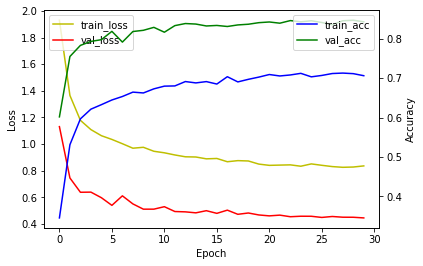

In [50]:
acc_loss_plot(history)

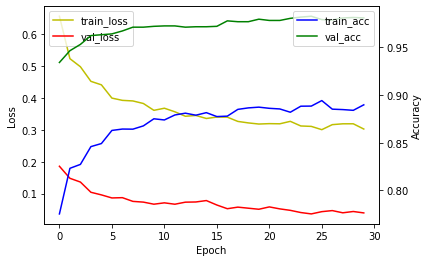

In [51]:
acc_loss_plot(history2)

### Test Set Prediction

In [69]:
top_path = "test_dataset\\test\\"
path_list = []

dataset = os.listdir(top_path)
  
for data in dataset:
  path_list.append(top_path + "{}".format(data))


X_test = pd.Series(path_list)

print(X_test.shape)

(1086,)


In [80]:
class TestDataGenerator(Sequence):
    def __init__(self, list_IDs, batch_size, img_size, img_channel, augmentations):
     
        # 데이터 이미지 개별 주소 [ DataFrame 형식 (image 주소, image 클래스) ]
        self.list_IDs = list_IDs

        # 학습 Batch 사이즈
        self.batch_size = batch_size
        # 이미지 리사이징 사이즈
        self.img_size = img_size
        # 이미지 채널 [RGB or Gray]
        self.img_channel = img_channel

        # 전체 데이터 수
        self.indexes = np.arange(len(self.list_IDs))

        self.augment = augmentations
   
    def __len__(self):
        len_ = int(len(self.list_IDs)/self.batch_size)
        if len_*self.batch_size < len(self.list_IDs):
            len_ += 1
        return len_
    
    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        list_IDs_temp = [self.list_IDs[k] for k in indexes]
        X = self.__data_generation__(list_IDs_temp)#, index)
        
        return np.stack([
            self.augment(image=x)["image"] for x in X
        ], axis=0)
            
    def __data_generation__(self, list_IDs_temp):#, index):
        X = np.zeros((self.batch_size, self.img_size, self.img_size, self.img_channel), dtype='uint8')
        
        for i, ID in enumerate(list_IDs_temp):
            img = cv2.imread(ID)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (self.img_size, self.img_size))
            X[i, ] = img 
        return X
    

test_generator = TestDataGenerator(X_test, batch_size, target_size,
                                img_ch, AUGMENTATIONS_TEST )

In [139]:
model.load_weights(checkpoint_filepath)
predictions = model.predict(test_generator)

categ_map = dict(zip(range(9), categories))


predictions = np.argmax(predictions, axis = 1)
predictions = np.vectorize(categ_map.get)(predictions)

output = pd.DataFrame({'files': dataset, 'pred': predictions[:len(X_test)]})
output.to_csv('test_pred_DenseNet121.csv')

In [140]:
output.head()

,files,pred
0,test10013.jpg,krusty
1,test10019.jpg,ned_flanders
2,test10028.jpg,ned_flanders
3,test10074.jpg,charles_montgomery
4,test10084.jpg,lisa_simpson
